In [1]:
import pandas as pd
import numpy as np
import csv
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

* Scopus 검색
* 키워드: UAM
* 검색 조건: Title, Abstract, Keywords 검색 / 연도 한정 X / English / Article과 Conference paper만 포함
* 총 1,595 documents

In [2]:
data = pd.read_csv('scopus_UAM_20230502.csv')
data

,Authors,Author full names,Author(s) ID,Title,Year,Link,Abstract,Author Keywords,Index Keywords
0,Qu W.; Xu C.; Tan X.; Tang A.; He H.; Liao X.,"Qu, Wenqiu (57219532725); Xu, Chenchen (572109...",57219532725; 57210913786; 55850564900; 5807437...,Preliminary Concept of Urban Air Mobility Traf...,2023,https://www.scopus.com/inward/record.uri?eid=2...,"Driven by recent technological breakthroughs, ...",eVTOL aircraft; traffic flow control; traffic ...,NaN
1,Martinez A.; Sanchez-Cuevas P.J.; Trujillo M.A...,"Martinez, A. (58038020000); Sanchez-Cuevas, P....",58038020000; 57195520737; 55325321200; 2301074...,Autonomous Landing Strategy for Vertiports: A ...,2023,https://www.scopus.com/inward/record.uri?eid=2...,Urban air mobility is raising a lot of attenti...,UAM; UAS; UAV; Vertiports; VTOL,NaN
2,Sarkar M.; Yan X.; Girma A.; Homaifar A.,"Sarkar, Mrinmoy (57210458974); Yan, Xuyang (57...",57210458974; 57201293686; 57207102648; 7003561775,A Comprehensive eVTOL Performance Evaluation F...,2023,https://www.scopus.com/inward/record.uri?eid=2...,"In this paper, we developed an open-source sim...",eVTOL; Simulation framework; UAM; UTM,NaN
3,Zhang H.; Fei Y.; Li J.; Li B.; Liu H.,"Zhang, Honghai (55685621600); Fei, Yuhan (5754...",55685621600; 57546716000; 58041927900; 5754633...,Method of Vertiport Capacity Assessment Based ...,2023,https://www.scopus.com/inward/record.uri?eid=2...,Urban air traffic has gradually attracted atte...,queuing theory; UAVs; urban air mobility (UAM)...,air traffic; assessment method; social mobilit...
4,Kudas D.; Wnęk A.; Gargula T.,"Kudas, Dawid (57196482822); Wnęk, Agnieszka (5...",57196482822; 55189512700; 34871904700,Optimisation of an Automatic Online Post-Proce...,2022,https://www.scopus.com/inward/record.uri?eid=2...,The paper presents an assessment of the accura...,EUPOS geodetic; geodetic network adjustment; n...,NaN
...,...,...,...,...,...,...,...,...,...
1590,Grekov K.B.; Tsapyuk E.A.,"Grekov, K.B. (9272219600); Tsapyuk, E.A. (7004...",9272219600; 7004278629,Treatment of rinsewater and wastewater from ch...,1984,https://www.scopus.com/inward/record.uri?eid=2...,Results are reported on the possibility of for...,NaN,INDUSTRIAL PLANTS; PHOTOGRAPHIC FILMS AND PLAT...
1591,Womboh B.S.,"Womboh, Benki S.H. (36708934600)",36708934600,Collection evaluation in Africa: A case study ...,1994,https://www.scopus.com/inward/record.uri?eid=2...,This is a case study of the University of Agri...,NaN,NaN
1592,Yocke M.A.; Mahoney L.A.; Hogo H.; Mirabella V.A.,"Yocke, M.A. (6602426415); Mahoney, L.A. (71030...",6602426415; 7103048563; 6602290913; 57189336393,Methodologies for applying the urban airshed m...,1989,https://www.scopus.com/inward/record.uri?eid=2...,Difficulties are encountered when attempting t...,NaN,Environmental Protection; Mathematical Models-...
1593,Meyer Jr. E.L.,"Meyer Jr., Edwin L. (7401539034)",7401539034,The use of ozone modeling in the design of con...,1989,https://www.scopus.com/inward/record.uri?eid=2...,Two urban scale photochemical models have been...,NaN,NaN


In [3]:
data['Year'].isnull().sum()
#결측치 없음

0

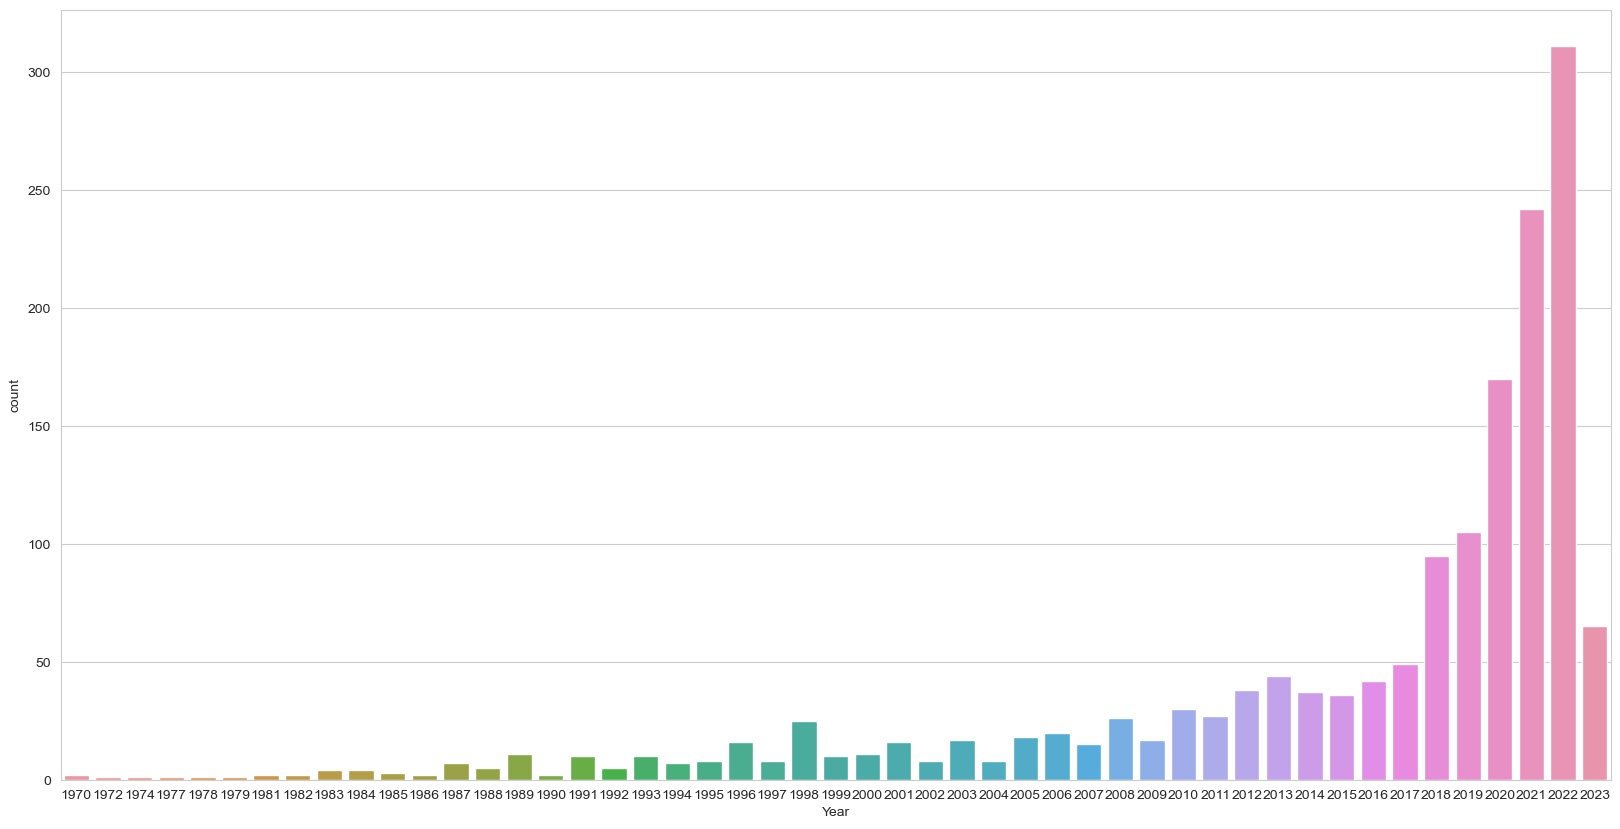

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize = (20,10))

sns.countplot(x = data['Year'])
plt.show()

In [5]:
country_data = pd.read_csv('국가별 통계.csv')
country_data

,Country,count
0,United States,655
1,Spain,144
2,China,129
3,Germany,109
4,South Korea,83
...,...,...
67,Georgia,1
68,Ecuador,1
69,Cuba,1
70,Bulgaria,1


In [32]:
rank = country_data['count'] >= 10
rank.value_counts()

count
False    44
True     28
Name: count, dtype: int64

In [36]:
country_data.drop(country_data.index[28:], axis = 0, inplace = True)
country_data

,Country,count
0,United States,655
1,Spain,144
2,China,129
3,Germany,109
4,South Korea,83
5,United Kingdom,74
6,Mexico,63
7,Undefined,62
8,Italy,55
9,Japan,42


<Axes: xlabel='count', ylabel='Country'>

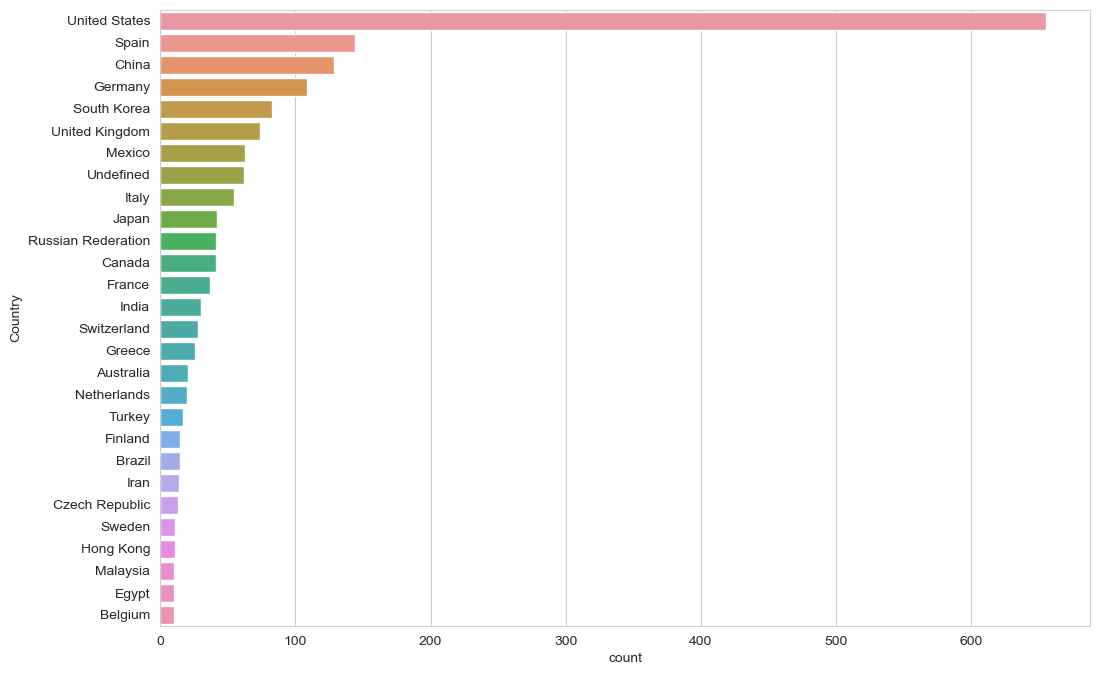

In [46]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'count', y = 'Country', data = country_data)

In [7]:
data_ab = data['Abstract']
data_ab

0       Driven by recent technological breakthroughs, ...
1       Urban air mobility is raising a lot of attenti...
2       In this paper, we developed an open-source sim...
3       Urban air traffic has gradually attracted atte...
4       The paper presents an assessment of the accura...
                              ...                        
1590    Results are reported on the possibility of for...
1591    This is a case study of the University of Agri...
1592    Difficulties are encountered when attempting t...
1593    Two urban scale photochemical models have been...
1594    Effect of concentration (2. 0-60. 0 kg/m**3) o...
Name: Abstract, Length: 1595, dtype: object

## 데이터 전처리

### Tokenization

#### 노이즈 및 불용어 제거

In [8]:
import nltk
from nltk.corpus import stopwords

In [9]:
# 불용어 지정
my_stopword =stopwords.words('english') + ['research', 'implication', 'UAM', 'urban', 'air', 'mobility', 'paper', 'study', 'analysis', 'method', 'model']
print(my_stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words = my_stopword, 
                     max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(data_ab)

# LDA 토픽 모델링 실행

### 사이킷런을 이용한 토픽 모델링

In [11]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수
                                max_iter=5, 
                                topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='online', 
                                n_jobs= -1, #사용 processor 수
                                random_state=0)

review_topics = lda.fit_transform(review_cv)
print('#shape of review_topics:', review_topics.shape)
print('#Sample of review_topics:', review_topics[0])

gross_topic_weights = np.mean(review_topics, axis=0)
print('#Sum of topic weights of documents:', gross_topic_weights)

print('#shape of topic word distribution:', lda.components_.shape)

#shape of review_topics: (1595, 10)
#Sample of review_topics: [0.03  0.017 0.017 0.013 0.021 0.384 0.016 0.065 0.282 0.156]
#Sum of topic weights of documents: [0.126 0.079 0.124 0.087 0.117 0.102 0.051 0.064 0.158 0.091]
#shape of topic word distribution: (10, 2000)


In [12]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

print_top_words(lda,cv.get_feature_names_out(), 10)

Topic #0: ultrasonic, process, surface, manufacturing, material, metal, additive, materials, using, temperature
Topic #1: system, systems, data, based, applications, user, information, new, sensor, processing
Topic #2: ozone, concentrations, results, emissions, models, quality, modeling, activity, emission, photochemical
Topic #3: uncertainty, uncertainties, data, nuclear, sensitivity, cross, calculations, benchmark, code, core
Topic #4: results, use, used, university, methods, management, years, new, also, different
Topic #5: time, based, algorithm, aircraft, airspace, traffic, proposed, operations, flight, planning
Topic #6: power, cells, energy, rate, light, growth, changes, cell, glucose, weight
Topic #7: control, proposed, performance, based, controller, aerial, system, uams, tracking, using
Topic #8: aircraft, operations, vehicles, vehicle, new, transportation, traffic, systems, flight, design
Topic #9: noise, design, aircraft, rotor, flight, vertical, electric, reserved, perform

n_components: 6, perplexity: 1147.289
n_components: 7, perplexity: 1132.430
n_components: 8, perplexity: 1147.360
n_components: 9, perplexity: 1166.765
n_components: 10, perplexity: 1182.122
n_components: 11, perplexity: 1188.875
n_components: 12, perplexity: 1204.498
n_components: 13, perplexity: 1230.157
n_components: 14, perplexity: 1234.697
n_components: 15, perplexity: 1259.448


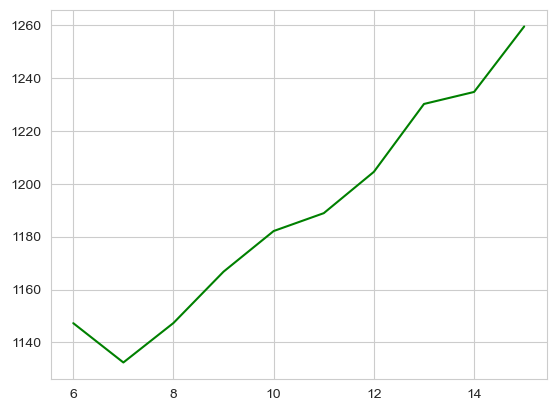

n_components with minimum perplexity: 7


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior= 0.1, 
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter, 
                                        topic_word_prior= topic_word_prior, 
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs= -1,
                                        random_state=7)    
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:",
      show_perplexity(review_cv, start=6, end=15))

In [14]:
lda = LatentDirichletAllocation(n_components = 8, #추출할 topic의 수를 지정
                                max_iter=20, 
                                topic_word_prior= 0.1, 
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1, 
                                random_state=7)

review_topics = lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: uncertainty, uncertainties, data, nuclear, cross, fuel, sensitivity, calculations, code, benchmark
Topic #1: ultrasonic, process, manufacturing, material, metal, additive, materials, using, temperature, strength
Topic #2: noise, design, rotor, flight, vertical, electric, aircraft, results, performance, control
Topic #3: system, based, proposed, data, information, control, results, approach, performance, ieee
Topic #4: use, results, also, development, new, years, used, public, well, case
Topic #5: aircraft, operations, vehicles, traffic, flight, systems, airspace, system, transportation, safety
Topic #6: ozone, concentrations, emissions, models, modeling, quality, results, emission, area, data
Topic #7: activity, rate, different, increased, water, results, showed, total, respectively, increase



### 토픽 트렌드로 시간에 따른 주제의 변화 알아내기

In [15]:
# 토픽 트렌드를 찾기 위해서는 각 문서의 날짜(start)와 토픽 분포를 결합해야 한다.
# 날짜에서 연도와 월만 잘라 가져온다.
trend_data = pd.DataFrame(review_topics, columns = ['Topic'+str(i) for i in range(1, 9)])
trend_data = pd.concat([trend_data, data.Year], axis = 1)
trend_data

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Year
0,0.013749,0.031741,0.138248,0.068416,0.046007,0.668782,0.017768,0.015289,2023
1,0.021674,0.023090,0.028617,0.203366,0.273455,0.373038,0.022675,0.054085,2023
2,0.017624,0.016189,0.157024,0.351533,0.027609,0.402529,0.015091,0.012401,2023
3,0.054533,0.011927,0.039676,0.226783,0.068172,0.488320,0.026608,0.083983,2023
4,0.074632,0.022082,0.016632,0.532653,0.152801,0.019697,0.156013,0.025490,2022
...,...,...,...,...,...,...,...,...,...
1590,0.088154,0.189753,0.038835,0.022641,0.037579,0.026790,0.023704,0.572543,1984
1591,0.170743,0.012037,0.012712,0.094364,0.569614,0.082500,0.030871,0.027159,1994
1592,0.032117,0.017261,0.025048,0.177370,0.186412,0.023597,0.509931,0.028264,1989
1593,0.035053,0.028843,0.027708,0.109850,0.133639,0.036398,0.591009,0.037500,1989


In [16]:
trend = trend_data.groupby(['Year']).mean()
trend.tail(10)

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8
Year,,,,,,,,
2014,0.327233,0.210837,0.047639,0.108519,0.122515,0.035188,0.071706,0.076363
2015,0.175506,0.168003,0.048418,0.152433,0.185758,0.024354,0.077097,0.168430
2016,0.281793,0.244552,0.047022,0.129761,0.099781,0.025688,0.045437,0.125967
2017,0.115469,0.203650,0.093696,0.153723,0.218012,0.038750,0.060271,0.116430
2018,0.101801,0.178704,0.120521,0.106775,0.103765,0.246641,0.036714,0.105080
2019,0.091165,0.099623,0.100268,0.124842,0.146166,0.312960,0.043977,0.080999
2020,0.095934,0.076175,0.122520,0.132271,0.140643,0.330983,0.040315,0.061159
2021,0.043351,0.062950,0.143550,0.117186,0.142920,0.382410,0.049335,0.058299
2022,0.042338,0.067889,0.164059,0.149714,0.131192,0.346250,0.043229,0.055328


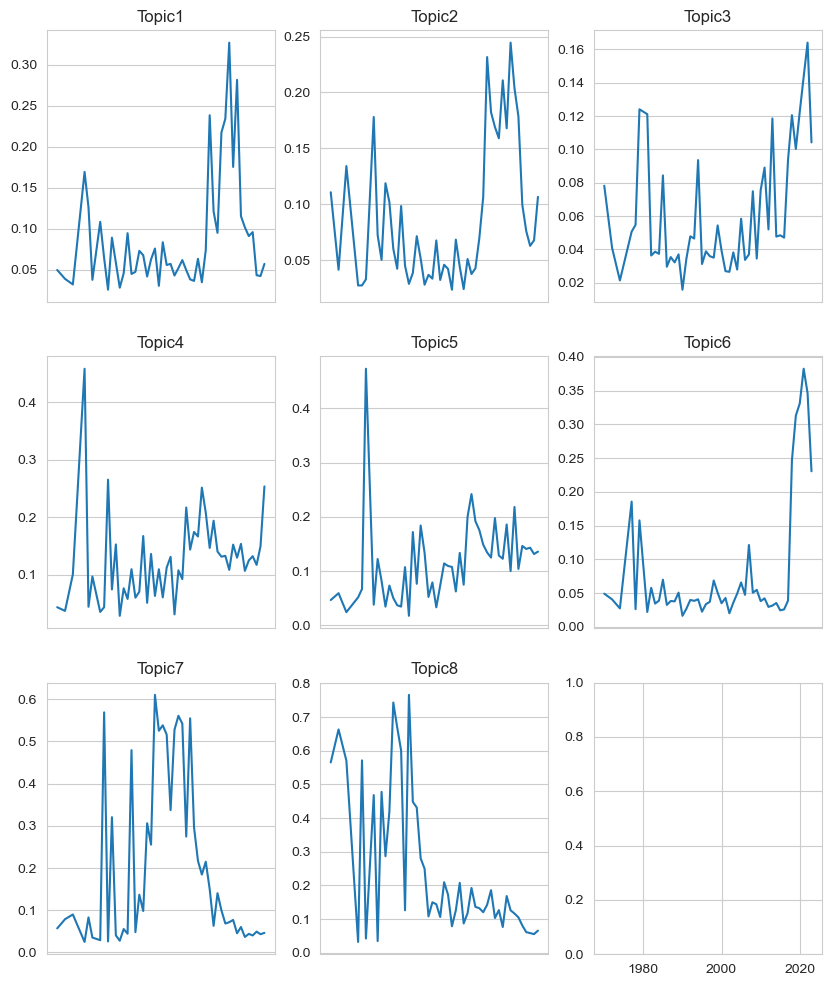

In [17]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(3, 3, sharex = 'col', figsize = (10,12))
for col, ax in zip(trend.columns.tolist(), axes.ravel()):
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend[col])
plt.show()

* Topic 7과 8의 경우 점차 감소하는 추세이며(Cold Topic), Topic 1, 2, 3, 6은 2000년대 중후반부터 증가하는 추세(Hot Topic)를 보인다.

### Gensim을 이용한 토픽 모델링

In [18]:
# 필요한 library들을 import
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) 
    # stopwords 제외
    words = [word for word in tokens if (word not in my_stopword) and len(word) > 2]
    return words

abstract = [tokenizer(data_ab) for data_ab in data_ab]

In [19]:
from gensim.corpora.dictionary import Dictionary

# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(abstract)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in abstract]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 16435
#Number of unique words after removing rare and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 1595


In [20]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

CPU times: total: 5.3 s
Wall time: 5.3 s


In [21]:
model.print_topics(num_words=10)

[(0,
  '0.015*"control" + 0.011*"system" + 0.010*"design" + 0.009*"performance" + 0.009*"aircraft" + 0.008*"based" + 0.008*"proposed" + 0.008*"flight" + 0.007*"controller" + 0.006*"rotor"'),
 (1,
  '0.028*"ozone" + 0.013*"concentrations" + 0.013*"emissions" + 0.010*"emission" + 0.009*"modeling" + 0.009*"results" + 0.009*"nox" + 0.009*"quality" + 0.009*"photochemical" + 0.008*"models"'),
 (2,
  '0.012*"activity" + 0.010*"flight" + 0.008*"cell" + 0.008*"rotor" + 0.007*"cells" + 0.007*"low" + 0.006*"species" + 0.006*"showed" + 0.006*"also" + 0.006*"results"'),
 (3,
  '0.013*"surface" + 0.012*"ultrasonic" + 0.011*"cutting" + 0.010*"process" + 0.010*"results" + 0.010*"machining" + 0.009*"milling" + 0.007*"used" + 0.006*"assisted" + 0.006*"tool"'),
 (4,
  '0.012*"results" + 0.010*"based" + 0.008*"time" + 0.008*"using" + 0.008*"used" + 0.007*"proposed" + 0.007*"system" + 0.007*"data" + 0.005*"use" + 0.005*"information"'),
 (5,
  '0.020*"uncertainty" + 0.015*"data" + 0.014*"uncertainties" + 0.

In [22]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)[0])

#topic distribution of the first document:  [(6, 0.4233), (8, 0.014678862), (9, 0.5543249)]


In [23]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.145347  0.004030       1        1  21.946977
8      0.064668  0.002463       2        1  11.197702
5     -0.036655  0.087340       3        1  10.479735
6      0.099807 -0.027784       4        1  10.103277
4     -0.015310  0.006951       5        1   9.733347
7     -0.124569 -0.087570       6        1   9.594421
1     -0.081711  0.137049       7        1   8.013091
0      0.063538 -0.030897       8        1   7.364332
3     -0.097556 -0.074765       9        1   7.028915
2     -0.017559 -0.016817      10        1   4.538203, topic_info=             Term        Freq       Total Category  logprob  loglift
1992        ozone  372.000000  372.000000  Default  30.0000  30.0000
255   uncertainty  364.000000  364.000000  Default  29.0000  29.0000
288    ultrasonic  306.000000  306.000000  Default  28.0000  28.0000
3        aircraft  772.000000  772.000000  Default  27.0000  27.0000
308        flight  591.000000  591.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
30           high   26.082692  505.138421  Topic10  -5.4735   0.1291
1023        noise   23.036277  352.874811  Topic10  -5.5977   0.3636
110          used   22.848990  628.654271  Topic10  -5.6058  -0.2220
3        aircraft   22.834418  772.586075  Topic10  -5.6065  -0.4288
785    conditions   22.804459  286.153517  Topic10  -5.6078   0.5631

[623 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1990      3  0.147864   1995
1990      7  0.776287   1995
1990     10  0.036966   1995
1977      2  0.048683   2003
1977      5  0.438143   2003
...     ...       ...    ...
211       6  0.025399  years
211       7  0.016932  years
211       8  0.076196  years
211       9  0.093128  years
211      10  0.067729  years

[3459 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 6, 7, 5, 8, 2, 1, 4, 3])

In [24]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

-1.7868441961054908


num_topics: 6, perplexity: -7.278, coherence: -2.063
num_topics: 7, perplexity: -7.277, coherence: -2.114
num_topics: 8, perplexity: -7.302, coherence: -2.319
num_topics: 9, perplexity: -7.336, coherence: -2.337
num_topics: 10, perplexity: -7.356, coherence: -2.906
num_topics: 11, perplexity: -7.394, coherence: -2.664
num_topics: 12, perplexity: -7.431, coherence: -2.587
num_topics: 13, perplexity: -7.474, coherence: -2.392
num_topics: 14, perplexity: -7.512, coherence: -2.632
num_topics: 15, perplexity: -7.544, coherence: -2.783


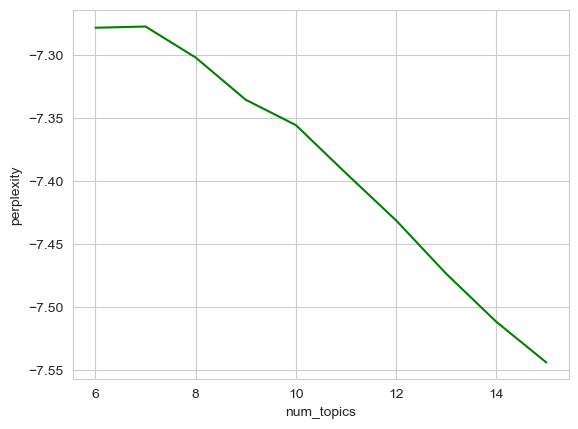

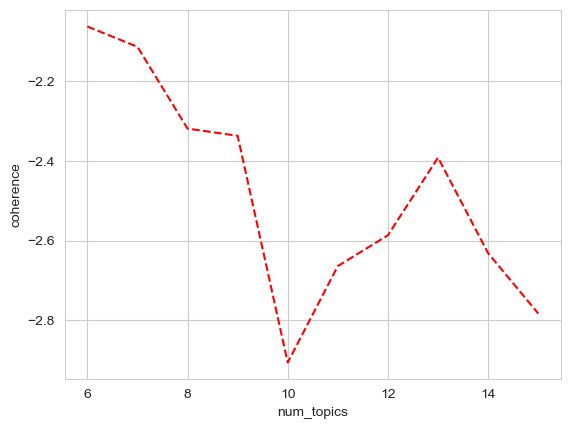

In [25]:
def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, 
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

show_coherence(corpus, dictionary, start=6, end=15)

* 혼란도는 토픽 수가 6, 7일 때 가장 좋고, 토픽 응집도는 6일 때 가장 좋다.

In [26]:
from gensim.models import LdaModel

num_topics = 6 # 혼란도와 토픽 응집도 분포에 따라 토픽의 개수를 10개에서 6개로 조정
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

CPU times: total: 5.14 s
Wall time: 5.14 s


In [27]:
model.print_topics(num_words=10)

[(0,
  '0.013*"aircraft" + 0.010*"system" + 0.009*"operations" + 0.009*"design" + 0.008*"vehicles" + 0.008*"flight" + 0.008*"traffic" + 0.008*"airspace" + 0.008*"systems" + 0.007*"based"'),
 (1,
  '0.017*"ozone" + 0.009*"emissions" + 0.008*"concentrations" + 0.008*"system" + 0.008*"power" + 0.007*"quality" + 0.007*"results" + 0.007*"models" + 0.007*"modeling" + 0.007*"used"'),
 (2,
  '0.010*"rotor" + 0.009*"flight" + 0.006*"activity" + 0.006*"rights" + 0.006*"reserved" + 0.006*"using" + 0.005*"results" + 0.005*"noise" + 0.005*"also" + 0.005*"aircraft"'),
 (3,
  '0.013*"ultrasonic" + 0.011*"process" + 0.007*"manufacturing" + 0.007*"results" + 0.007*"using" + 0.007*"surface" + 0.006*"used" + 0.006*"metal" + 0.006*"additive" + 0.006*"high"'),
 (4,
  '0.010*"based" + 0.010*"results" + 0.008*"proposed" + 0.008*"using" + 0.007*"time" + 0.006*"used" + 0.006*"data" + 0.006*"system" + 0.005*"control" + 0.005*"use"'),
 (5,
  '0.016*"uncertainty" + 0.015*"data" + 0.011*"uncertainties" + 0.009*"no

In [28]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.097909 -0.048268       1        1  35.129556
4     -0.000138 -0.013141       2        1  16.888195
3      0.139307 -0.029114       3        1  16.403106
5     -0.017952  0.067876       4        1  11.350125
2     -0.017844 -0.054150       5        1  10.448752
1     -0.005465  0.076796       6        1   9.780267, topic_info=               Term        Freq       Total Category  logprob  loglift
1992          ozone  311.000000  311.000000  Default  30.0000  30.0000
255     uncertainty  302.000000  302.000000  Default  29.0000  29.0000
288      ultrasonic  308.000000  308.000000  Default  28.0000  28.0000
427   uncertainties  225.000000  225.000000  Default  27.0000  27.0000
176            data  664.000000  664.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
179       different   50.756389  468.088907   Topic6  -5.5755   0.1032
203         systems   50.692169  562.236969   Topic6  -5.5768  -0.0813
73             also   48.858758  494.111622   Topic6  -5.6136   0.0110
93              new   49.137872  576.183280   Topic6  -5.6079  -0.1370
15          control   48.544747  509.328813   Topic6  -5.6201  -0.0258

[413 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1990      2  0.042978  1995
1990      4  0.214890  1995
1990      5  0.042978  1995
1990      6  0.687649  1995
510       1  0.074259  2012
...     ...       ...   ...
552       5  0.078959  work
552       6  0.065799  work
1204      1  0.073795   www
1204      2  0.701049   www
1204      3  0.221384   www

[1678 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 4, 6, 3, 2])